# Introduction to Data Science
## Homework 3

Student Name: Joyce Wu

Student Netid: jmw784

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$\text{Information Gain} = H(Y) - H(Y \mid X) = -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$
We know that:
$$H(Y \mid X = x) = -\sum_{y \in Y} p(y \mid x) \cdot log(p(y \mid x))$$
Plug back into the first equation.
$$= -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X} \sum_{y \in Y} p(x) \cdot p(y \mid x) \cdot log\big(p(y \mid x)\big)$$
We know that:
$$p(y \mid x) = \cfrac{p(x,y)}{p(x)}$$

Therefore,
$$p(x)p(y \mid x) = p(x,y)$$
Plug both relations into the equation:

$$= -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X} \sum_{y \in Y} p(x,y)\cdot log\big(\frac{p(x,y)}{p(x)}\big)$$

We also know that:
$$p(y) = \sum_{x \in X}  p(x,y)$$

Plug into the equation:

$$= -\sum_{y \in Y} \sum_{x \in X}  p(x,y) \cdot log(p(y)) + \sum_{x \in X} \sum_{y \in Y} p(x,y)\cdot log\big(\frac{p(x,y)}{p(x)}\big)$$

You can switch the summation order:

$$= -\sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y)) + \sum_{y \in Y} \sum_{x \in X} p(x,y)\cdot log\big(\frac{p(x,y)}{p(x)}\big)$$

Combine the two summations:

$$= \sum_{y \in Y} \sum_{x \in X} -p(x,y) \cdot log(p(y)) + p(x,y)\cdot log\big(\frac{p(x,y)}{p(x)}\big)$$
$$= \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot \big(log\frac{p(x,y)}{p(x)} - log(p(y)\big)$$
$$= \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log\big(\frac{p(x,y)}{p(x)p(y)}\big) = \text{Mutual Information}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats

#Create list for column names
colNames = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']
features = colNames[:11]
fullData = pd.read_csv('cell2cell_data.csv', names=colNames)

#Find out how many data points are in data
lenData = fullData.shape[0]

#Set the size for the train and test sets
train_df_size = int(np.floor(0.8*lenData))
test_df_size = lenData - train_df_size

#Randomly select index numbers for train_df
indices = np.arange(0,lenData-1,1)
trainIndices = np.random.choice(indices, train_df_size, replace=False)
trainIndices.sort()

s = set(trainIndices)
testIndices = [x for x in indices if x not in s]
    
train_df = fullData.loc[trainIndices]
test_df = fullData.loc[testIndices]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

We can plot the histogram distributions of our sample along each of the variables and compare it to the histogram distributions of the entire data set. If there has been a significant shift in the distribution between the two (the sample and the population), then we may have had some selection bias. In this case, we know exactly what the distribution of the underlying population looks like, because it was the original sample. Therefore, we can easily compare the distributions. The prior distribution should look very similar to the sampled distribution. We can be fairly confident that our data was indeed randomly sampled on X if the distributions look comparable.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Code here
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_df[features], train_df['churndep'])

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

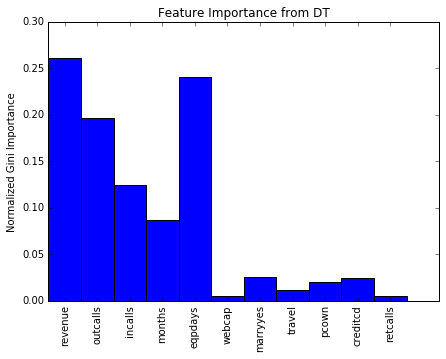

In [3]:
#Code here
x = np.arange(0,11,1)
importance = clf.feature_importances_
width = 1

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.set_ylabel('Normalized Gini Importance')
plt.title('Feature Importance from DT')
plt.bar(x, importance, width)
plt.xticks(x+.5, features, rotation='vertical')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [4]:
# Code/answer here
rankFeatures = [[importance[i],i] for i in xrange(len(importance))]
rankFeatures.sort(reverse=True)
Y = fullData['churndep']

for i in np.arange(0,3,1):

    feature = features[rankFeatures[i][1]]
    X = fullData[feature]
    corr = np.corrcoef(X,Y)[1,0]
    
    if corr > 0:
        sign = 'the relationship is positive'
    elif corr < 0:
        sign = 'the relationship is negative'
    else:
        sign = 'there is no linear relationship'
    
    print 'The correlation coefficient between churn and ',feature,' is ',corr,' and so',sign
    
np.corrcoef(fullData['revenue'],fullData['outcalls'])

The correlation coefficient between churn and  revenue  is  -0.0135660818676  and so the relationship is negative
The correlation coefficient between churn and  eqpdays  is  0.112730993316  and so the relationship is positive
The correlation coefficient between churn and  outcalls  is  -0.037233028525  and so the relationship is negative


array([[ 1.        ,  0.50087037],
       [ 0.50087037,  1.        ]])

The higher the revenue, the lower probability that the customer will churn, though the correlation is not very strong. It could be that each customer represents a cellphone plan, which may include family plans and not necessarily only individual contracts. The higher the revenue, the more cell phone lines the customer is paying for. A family may find it more troublesome to switch cell phone companies for all the lines, because all of the family members must agree to switch. Furthermore, each individual person on the plan may have been offered individual 2 year contracts that expire at different times, with fees for breaking the contract.

The higher the eqpdays, the higher probability that the customer will churn. The longer that a customer has the cellphone, the more they start thinking about switching companies because the cellphone may degrade over time. They may wish to switch companies when they feel that their cellphones has degraded past the point that they want to use it. Many cell service providers lock in customers for a period of time with a contract, and offer good incentives for new cellphones to people that switch to their company.

The higher the outcalls, the lower probability that the customer will churn, though the correlation is not very strong. If a customer has more lines on the contract, they probably have multiple people using the plan and therefore the number of outcalls will be higher. See the same reasoning for why the higher the revenue, the lower probability that a customer will churn. I checked the correlation coefficient between these two variables, and they have a high positive correlation of 0.5. Therefore, it is likely both trends are affected by a underlying cause common to both variables.

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [5]:
# Code here
trainAccuracy = clf.score(train_df[features],train_df['churndep'])
print 'Training Accuracy: ',trainAccuracy,'%'

testAccuracy = clf.score(test_df[features],test_df['churndep'])
print 'Testing Accuracy: ',testAccuracy,'%'

Training Accuracy:  0.999811835544 %
Testing Accuracy:  0.527035503701 %


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [6]:
# Code here

min_samples_split_values = np.floor(np.linspace(0.01*lenData, 0.1*lenData, 10))
min_samples_leaf_values = np.floor(np.linspace(0.001*lenData, 0.01*lenData, 10))

2\. Explain in words your reasoning for choosing the above ranges.

I chose the min samples split size to be a proportion of the length of the original data set. This is because I did not want a split to contain less than 1% of the original data, because the splits may not be as significant in this case. I increased this restriction up to 10% of the original data, so that I could see a significant range of accuracies. I think that the min sample leaf size should be an order of magnitude under the minimum sample split size, because this allows for more granularity in our model. Therefore, I chose a range of min sample leaf sizes to be between 0.1% and 1% of the original data.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

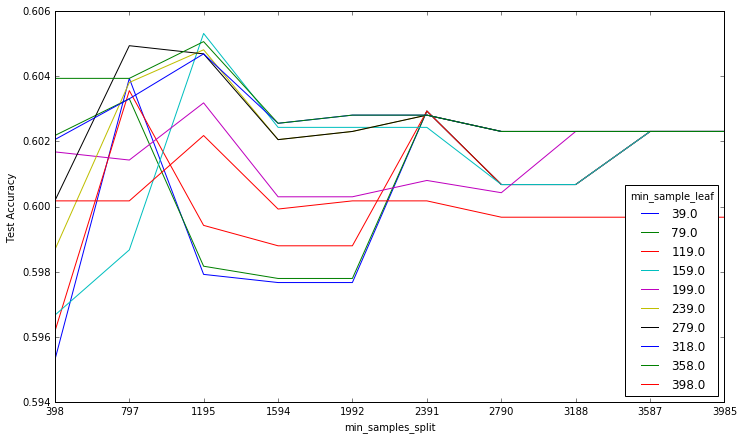

In [7]:
# Code here

import matplotlib.pyplot as plt
%matplotlib inline
classifierAcc = pd.DataFrame(columns=['min_samples_split','min_samples_leaf','Test Accuracy'])

for i in min_samples_split_values:
    for j in min_samples_leaf_values:
        clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=i,min_samples_leaf=j)
        clf = clf.fit(train_df[features], train_df['churndep'])
        testAccuracy = clf.score(test_df[features],test_df['churndep'])
        newRow = pd.DataFrame({'min_samples_split': [i], 'min_samples_leaf': [j], 'Test Accuracy': [testAccuracy]})
        classifierAcc = pd.concat([classifierAcc,newRow],ignore_index=True)

plt.rcParams['figure.figsize'] = (12.0, 7.0)
fig, ax = plt.subplots()
for i, j in classifierAcc.groupby('min_samples_leaf'):
    plt.plot(j['min_samples_split'],j['Test Accuracy'],label=i)
ax.set_xticks(min_samples_split_values)
ax.set_xlim([min_samples_split_values.min(), min_samples_split_values.max()])
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Test Accuracy')
plt.legend(title='min_sample_leaf', loc=4)
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [8]:
# Code here
maxIndex = classifierAcc['Test Accuracy'].idxmax()
maxConfig = classifierAcc.loc[[maxIndex]]

maxConfig

,Test Accuracy,min_samples_leaf,min_samples_split
23,0.605319,159.0,1195.0


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

If I were working for a marketing department, I would use the churn prediction model to try to predict customers that are likely to churn prior to the customers churning. I would target these customers with special offers to entice them to stay. Churn prediction can be good for the business, because it allows the business to take action to prevent the churn before it happens. Understanding the model can also help the business improve churn. The business can create marketing campaigns to specifically target new customers that are unlikely to churn in the future. It can also help the business make decisions on how to structure their plans to reduce some underlying causes of churn. Once these actions have been performed, we may need to update the churn prediction model so that it is still accurate.